Epoch [1] - Train Loss: 0.6178, Train Acc: 0.8899
Epoch [1] - Val Loss: 0.1529, Val Acc: 0.9828
Epoch [2] - Train Loss: 0.1615, Train Acc: 0.9703
Epoch [2] - Val Loss: 0.0679, Val Acc: 0.9882
Epoch [3] - Train Loss: 0.0986, Train Acc: 0.9775
Epoch [3] - Val Loss: 0.0462, Val Acc: 0.9884
Epoch [4] - Train Loss: 0.0778, Train Acc: 0.9803
Epoch [4] - Val Loss: 0.0336, Val Acc: 0.9914
Epoch [5] - Train Loss: 0.0654, Train Acc: 0.9813
Epoch [5] - Val Loss: 0.0339, Val Acc: 0.9899
Epoch [6] - Train Loss: 0.0606, Train Acc: 0.9825
Epoch [6] - Val Loss: 0.0296, Val Acc: 0.9907
Epoch [7] - Train Loss: 0.0532, Train Acc: 0.9841
Epoch [7] - Val Loss: 0.0285, Val Acc: 0.9918
Epoch [8] - Train Loss: 0.0491, Train Acc: 0.9853
Epoch [8] - Val Loss: 0.0250, Val Acc: 0.9922
Epoch [9] - Train Loss: 0.0481, Train Acc: 0.9851
Epoch [9] - Val Loss: 0.0291, Val Acc: 0.9904
Epoch [10] - Train Loss: 0.0441, Train Acc: 0.9870
Epoch [10] - Val Loss: 0.0229, Val Acc: 0.9929
Epoch [11] - Train Loss: 0.0417, Train

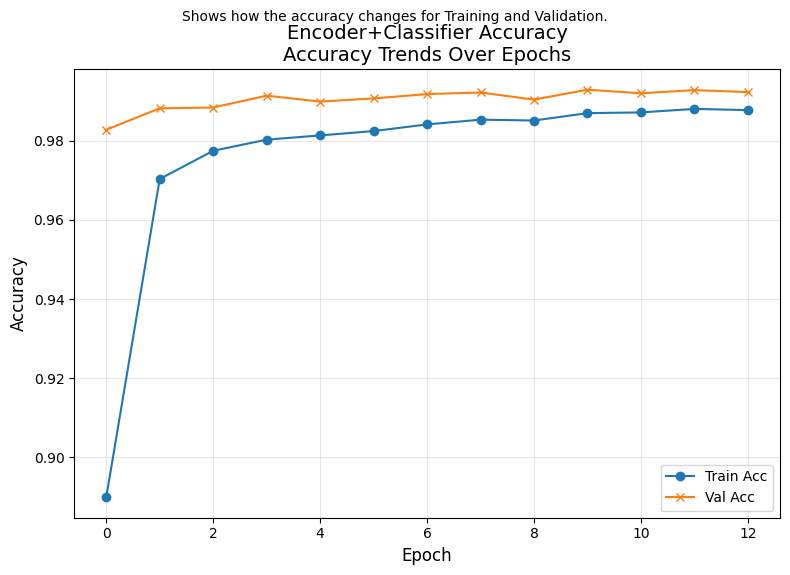

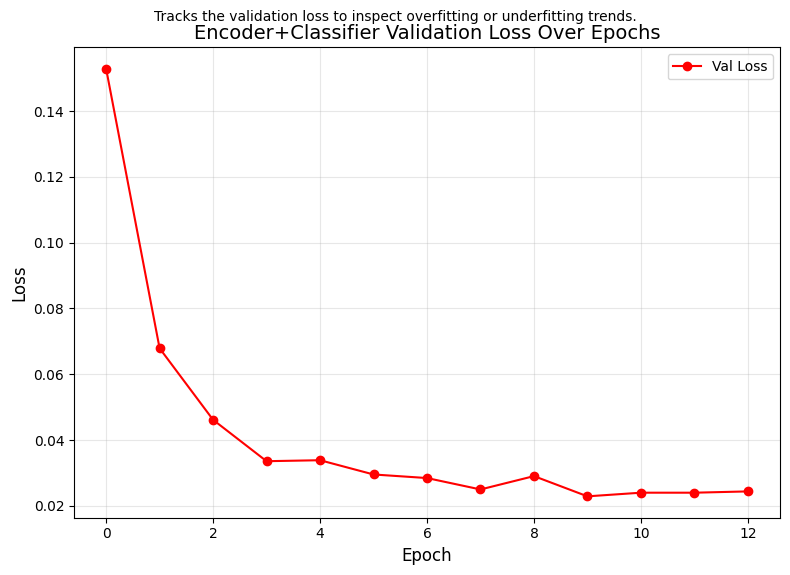

=== Final Encoder+Classifier Metrics ===
Val Loss: 0.0244
Train Acc: 98.78%
Val   Acc: 99.23%


In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
sys.path.append('..')

from models.mnist_encoder_classifier import MNISTEncoderClassifier
from trainers.encoder_classifier_trainer import EncoderClassifierTrainer

data_path = "/datasets/cv_datasets/data"



train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])
val_transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root=data_path, train=True, download=False, transform=train_transform)
val_dataset   = datasets.MNIST(root=data_path, train=False, download=False, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model = MNISTEncoderClassifier(
input_shape=(1,28,28),
channels=[32,64],
kernel_sizes=[3,3],
strides=[2,2],
paddings=[1,1],
latent_dim=128,
hidden_dims=[1024],
batch_norm_fc=True,
batch_norm_conv=True,
num_classes=10
)

trainer = EncoderClassifierTrainer(
model=model,
train_loader=train_loader,
val_loader=val_loader,
device='cuda',
lr=1e-4,
num_epochs=40,
weight_decay=1e-4,
early_stopping=True,
patience=3
)
trainer.train()
trainer.plot_metrics()

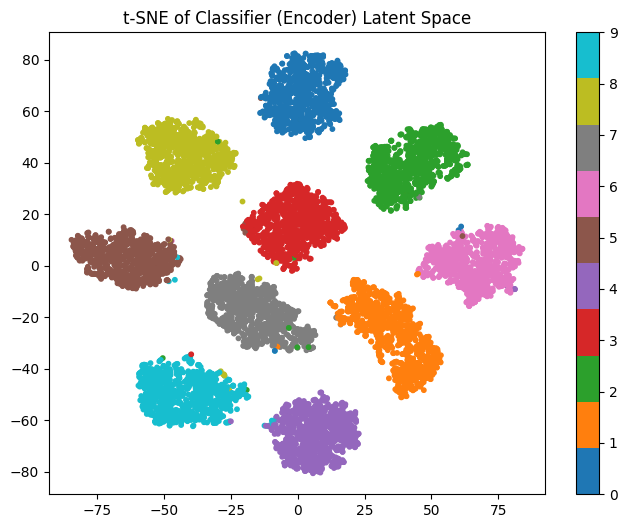

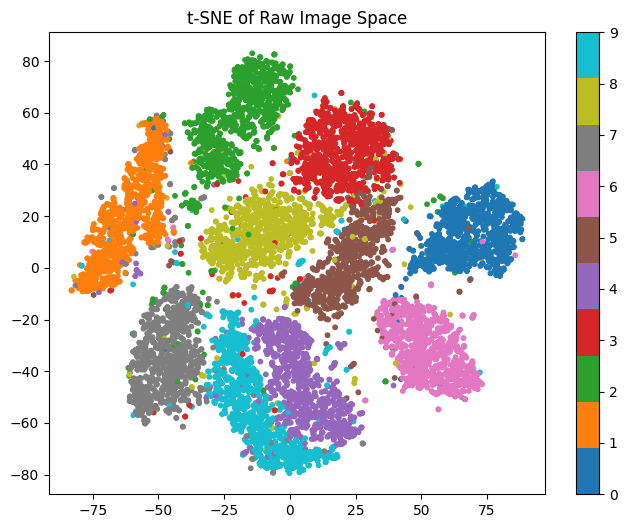

In [2]:
from utils import plot_tsne_classifier
plot_tsne_classifier(model, val_loader, device='cuda')